In [87]:
import anndata as ad
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from pathlib import Path
import pandas as pd
import seaborn as sns
from scipy.linalg import bandwidth

In [88]:
deconvs_dir = Path("../deconvolutions/SKCM")
assert deconvs_dir.is_dir()

In [89]:
for file in deconvs_dir.glob("*.h5ad"):
    adata = ad.read(file)
    fractions = adata.to_df().T.sum()
    fractions = fractions / fractions.sum()
    break
df = pd.DataFrame(fractions).T
df

/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


,B cells,CD8+ T cells,Melanoma cells_tumor71,Melanoma cells_tumor81,Melanoma cells_tumor80,CD4+ T cells,Macrophages/Monocytes,regulatory T cells,Cancer associated fibroblasts,Dendritic cells,...,Melanoma cells_tumor82,Melanoma cells_tumor53,Melanoma cells_tumor59,Melanoma cells_tumor65,Melanoma cells_tumor78,Melanoma cells_tumor84,Melanoma cells_tumor60,Melanoma cells_tumor88,Melanoma cells_tumor89,Melanoma cells_tumor94
0,0.002463,0.026347,0.000005,0.000005,0.009321,0.000011,0.063291,0.019333,0.111282,0.002316,...,0.101554,1.505457e-07,1.164602e-11,0.04274,0.010731,0.127126,0.052836,0.001125,0.04283,0.039268


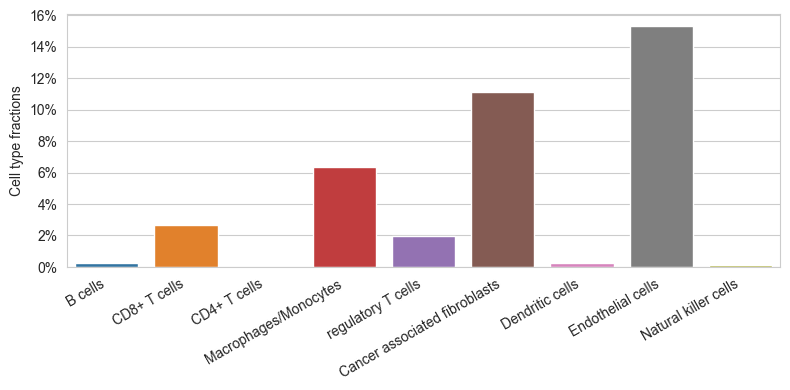

In [94]:
fig = plt.figure(figsize=(8,4))
ax = sns.barplot(df[['B cells', 'CD8+ T cells', 'CD4+ T cells',
       'Macrophages/Monocytes', 'regulatory T cells',
       'Cancer associated fibroblasts', 'Dendritic cells', 'Endothelial cells',
       'Natural killer cells']])
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel("Cell type fractions")
plt.tight_layout()
plt.savefig("../plots/fraction-individual.svg")
plt.show()

In [80]:
fractions_list = []
for file in deconvs_dir.glob("*.h5ad"):
    adata = ad.read(file)
    fractions = adata.to_df().T.sum()
    fractions = fractions / fractions.sum()
    fractions_list.append(fractions)

/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/anndata/__init__.py:42: FutureWarning: `anndata.read` is deprec

In [81]:
df = pd.concat(fractions_list, axis=1).T

In [82]:
df.columns

Index(['B cells', 'CD8+ T cells', 'Melanoma cells_tumor71',
       'Melanoma cells_tumor81', 'Melanoma cells_tumor80', 'CD4+ T cells',
       'Macrophages/Monocytes', 'regulatory T cells',
       'Cancer associated fibroblasts', 'Dendritic cells', 'Endothelial cells',
       'Natural killer cells', 'Melanoma cells_tumor79',
       'Melanoma cells_tumor82', 'Melanoma cells_tumor53',
       'Melanoma cells_tumor59', 'Melanoma cells_tumor65',
       'Melanoma cells_tumor78', 'Melanoma cells_tumor84',
       'Melanoma cells_tumor60', 'Melanoma cells_tumor88',
       'Melanoma cells_tumor89', 'Melanoma cells_tumor94'],
      dtype='object')

/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-pa

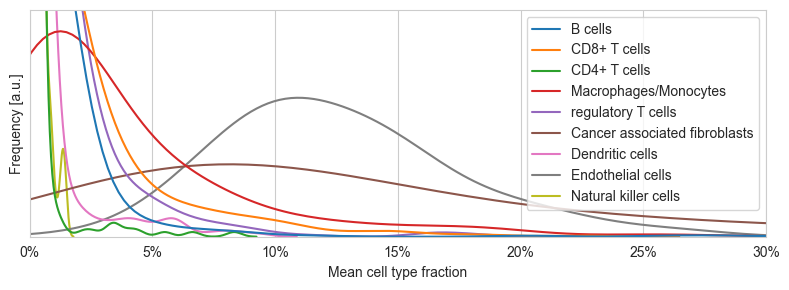

In [83]:
fig = plt.figure(figsize=(8,3))
ax = sns.kdeplot(data=df[['B cells', 'CD8+ T cells', 'CD4+ T cells',
       'Macrophages/Monocytes', 'regulatory T cells',
       'Cancer associated fibroblasts', 'Dendritic cells', 'Endothelial cells',
       'Natural killer cells']], bw_adjust=1.5)

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 0.3)
plt.ylim(0, 1.5)
plt.xlabel("Mean cell type fraction")
plt.ylabel("Frequency [a.u.]")
plt.yticks([])
plt.tight_layout()
plt.savefig("../plots/fraction.svg")
plt.show()

/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/halu/miniconda3/envs/MFP/lib/python3.10/site-pa

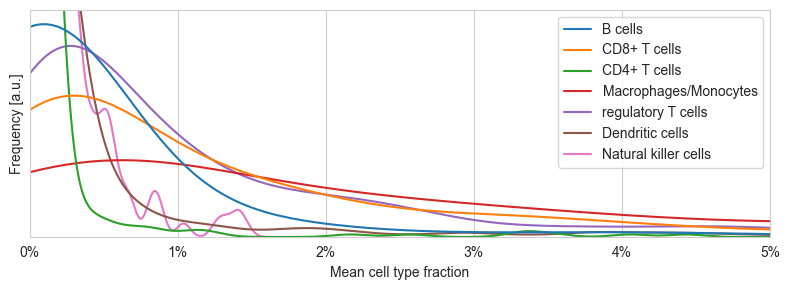

In [84]:
fig = plt.figure(figsize=(8,3))
ax = sns.kdeplot(data=df[['B cells', 'CD8+ T cells', 'CD4+ T cells',
       'Macrophages/Monocytes', 'regulatory T cells',
       'Dendritic cells',
       'Natural killer cells']], bw_adjust=0.6, gridsize=int(1e3))

ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
plt.xlim(0, 0.05)
plt.ylim(1e-2, 9)
plt.xlabel("Mean cell type fraction")
plt.ylabel("Frequency [a.u.]")
plt.yticks([])
plt.tight_layout()
plt.savefig("../plots/fraction-immune-only.svg")
plt.show()

In [85]:
adata

AnnData object with n_obs × n_vars = 23 × 19778
    var: 'gene_name'

In [86]:
df.shape

(473, 23)